<a href="https://colab.research.google.com/github/HarshitGoel5/Healthcare_Analytics/blob/main/Healthcare_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [158]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Thoracic-Surgery.csv', index_col = 'id')
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1 to 470
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 66.1+ KB


In [160]:
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = (df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

In [161]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


In [162]:
df.shape

(470, 17)

In [163]:
df['DGN'] = df['DGN'].str[-1:].astype(int)
df['PRE6'] = df['PRE6'].str[-1:].astype(int)
df['PRE14'] = df['PRE14'].str[-1:].astype(int)

In [164]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [165]:
df.columns

Index(['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [166]:
col = ['Daignosis','Forced_Capacity','Forced_Expiration','Zubrod_scale','Pain',' Haemoptysis','Dyspnoea',
       'Cough','Weakness','Size_of_tumor','diabetes','MI_6months','PAD','Smoker','Asthmatic','Age','Risk_1y']
df.columns = col

In [167]:
df.head()

,Daignosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1y
id,,,,,,,,,,,,,,,,,
1,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
2,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
3,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
4,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
5,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


Model Building

In [168]:
# Train test split
from sklearn.model_selection import train_test_split
X = df.drop('Risk_1y', axis=1)
y = df.Risk_1y
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [169]:
X_train.head()

,Daignosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes,MI_6months,PAD,Smoker,Asthmatic,Age
id,,,,,,,,,,,,,,,,
322,3,4.65,3.78,1,0,0,0,1,0,2,0,0,0,1,0,77
85,3,4.28,3.28,0,0,0,0,0,0,2,0,0,0,1,0,51
405,2,2.96,2.24,0,0,0,0,1,0,2,0,0,0,1,0,57
458,3,4.56,3.20,0,0,0,0,1,0,1,0,0,0,1,0,61
270,3,4.28,3.28,1,1,0,0,1,0,1,0,0,0,1,0,71


In [170]:
y_test[:10]

,Risk_1y
id,
340,0
145,0
260,0
167,0
140,0
389,0
191,0
195,0
252,1



Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(x_test, y_test)

0.8652482269503546

In [172]:
y_pred = model_lr.predict(x_test)

In [173]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8652482269503546


In [174]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[121,   0],
       [ 19,   1]])

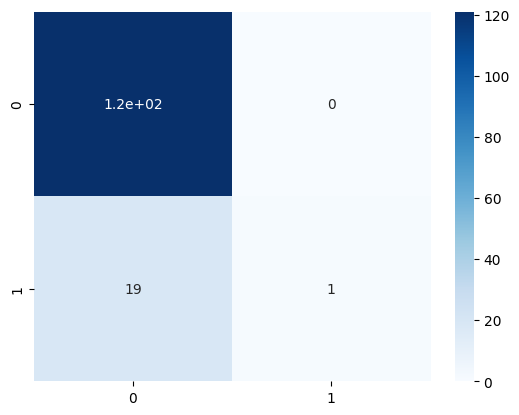

In [175]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

KNN

In [176]:
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier(n_neighbors=5)
model_knc.fit(X_train, y_train)
y_knn_pred = model_knc.predict(x_test)

In [177]:
accuracy_score(y_test, y_knn_pred)

0.8297872340425532

In [178]:
model_knc.predict_proba(x_test)

array([[0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6,

In [179]:
model_knc.score(x_test, y_test)

0.8297872340425532

[[117   4]
 [ 20   0]]


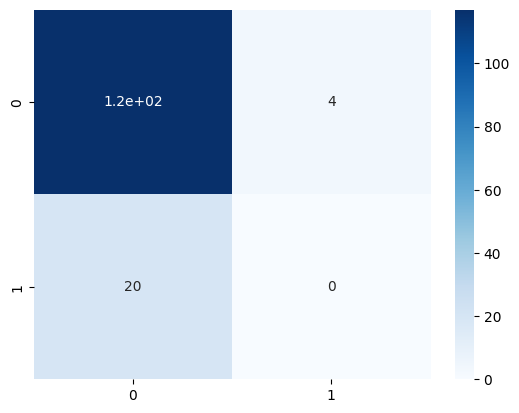

In [180]:
c_matrix = confusion_matrix(y_test, y_knn_pred)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

In [181]:
# For KNN = 1
model_knc_1 = KNeighborsClassifier(n_neighbors = 1)
model_knc_1.fit(X_train, y_train)
y_knn_pred_1 = model_knc_1.predict(x_test)
accuracy_score(y_test, y_knn_pred_1)

0.7943262411347518

[[111  10]
 [ 19   1]]


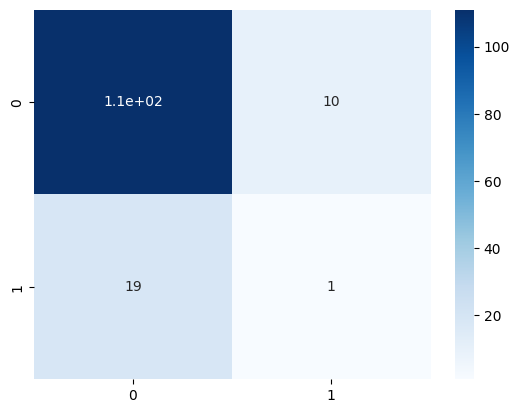

In [182]:
c_matrix = confusion_matrix(y_test, y_knn_pred_1)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

In [183]:
# for KNN = 3
model_knc_3 = KNeighborsClassifier(n_neighbors = 3)
model_knc_3.fit(X_train, y_train)
y_knn_pred_3 = model_knc_3.predict(x_test)
accuracy_score(y_test, y_knn_pred_3)

0.8156028368794326

[[115   6]
 [ 20   0]]


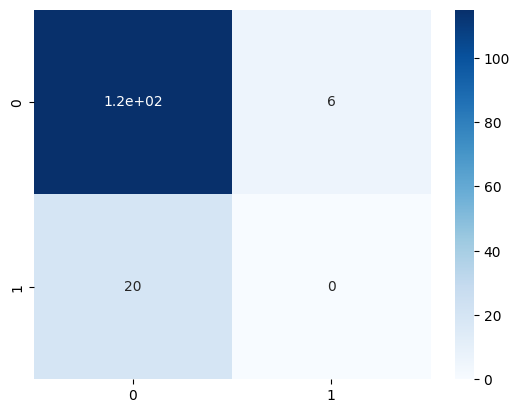

In [184]:
c_matrix = confusion_matrix(y_test, y_knn_pred_3)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

In [185]:

# for KNN = 5
model_knc_5 = KNeighborsClassifier(n_neighbors = 5)
model_knc_5.fit(X_train, y_train)
y_knn_pred_5 = model_knc_5.predict(x_test)
accuracy_score(y_test, y_knn_pred_5)

0.8297872340425532

[[117   4]
 [ 20   0]]


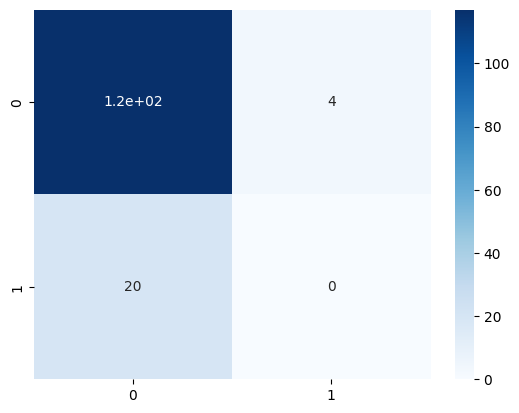

In [186]:
c_matrix = confusion_matrix(y_test, y_knn_pred_5)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

In [187]:
# for KNN = 7
model_knc_7 = KNeighborsClassifier(n_neighbors = 7)
model_knc_7.fit(X_train, y_train)
y_knn_pred_7 = model_knc_7.predict(x_test)
accuracy_score(y_test, y_knn_pred_7)

0.851063829787234

[[120   1]
 [ 20   0]]


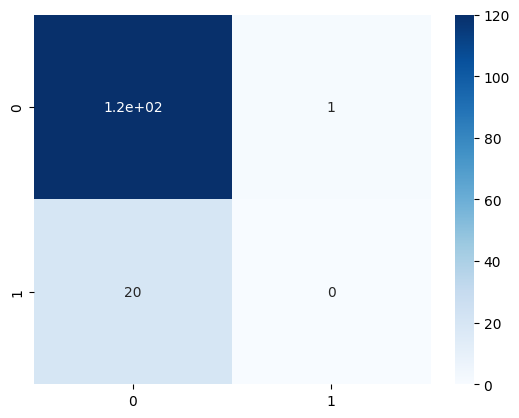

In [188]:
c_matrix = confusion_matrix(y_test, y_knn_pred_7)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

In [189]:
# for KNN = 9
model_knc_9 = KNeighborsClassifier(n_neighbors = 9)
model_knc_9.fit(X_train, y_train)
y_knn_pred_9 = model_knc_9.predict(x_test)
accuracy_score(y_test, y_knn_pred_9)

0.851063829787234

[[120   1]
 [ 20   0]]


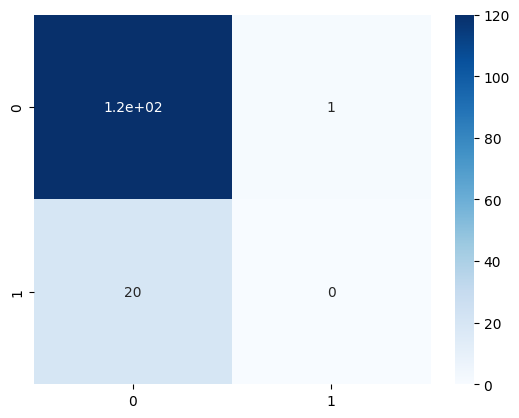

In [190]:
c_matrix = confusion_matrix(y_test, y_knn_pred_9)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

In [191]:
# Evaluation of KNN models on bases of Accuracy.
dict_ms = {'N_Neighbors':[1,3,5,7,9], 'Accuracy':[accuracy_score(y_test, y_knn_pred_1) * 100,
                                                  accuracy_score(y_test, y_knn_pred_3) * 100,
                                                  accuracy_score(y_test, y_knn_pred) * 100,
                                                  accuracy_score(y_test, y_knn_pred_7) * 100,
                                                  accuracy_score(y_test, y_knn_pred_9) * 100]}
model_selection = pd.DataFrame(dict_ms)
model_selection

,N_Neighbors,Accuracy
0,1,79.432624
1,3,81.560284
2,5,82.978723
3,7,85.106383
4,9,85.106383


In [192]:
x = df.drop('Risk_1y', axis=1)
x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [193]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.001), 'penalty': 'l2'}
accuracy : 0.8267992424242425


In [194]:

logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.9078014184397163


[[127   1]
 [ 13   0]]


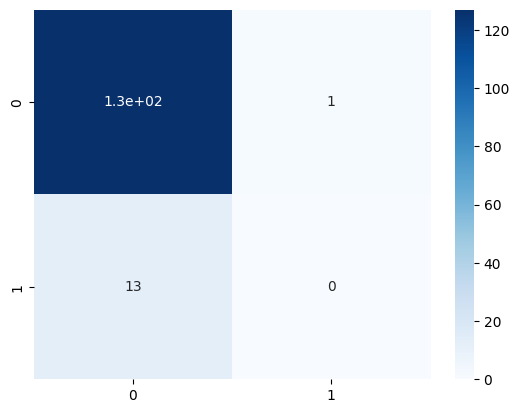

In [195]:
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

Decision Trees

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1 to 470
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Daignosis          470 non-null    int64  
 1   Forced_Capacity    470 non-null    float64
 2   Forced_Expiration  470 non-null    float64
 3   Zubrod_scale       470 non-null    int64  
 4   Pain               470 non-null    int64  
 5    Haemoptysis       470 non-null    int64  
 6   Dyspnoea           470 non-null    int64  
 7   Cough              470 non-null    int64  
 8   Weakness           470 non-null    int64  
 9   Size_of_tumor      470 non-null    int64  
 10  diabetes           470 non-null    int64  
 11  MI_6months         470 non-null    int64  
 12  PAD                470 non-null    int64  
 13  Smoker             470 non-null    int64  
 14  Asthmatic          470 non-null    int64  
 15  Age                470 non-null    int64  
 16  Risk_1y            470 non-null

In [197]:
category_col = ['Daignosis','Zubrod_scale','Pain', ' Haemoptysis', 'Dyspnoea', 'Cough','Weakness',
               'Size_of_tumor', 'diabetes', 'MI_6months', 'PAD', 'Smoker', 'Asthmatic', 'Risk_1y']
for col in category_col:
     df[col]=df[col].astype('category')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1 to 470
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Daignosis          470 non-null    category
 1   Forced_Capacity    470 non-null    float64 
 2   Forced_Expiration  470 non-null    float64 
 3   Zubrod_scale       470 non-null    category
 4   Pain               470 non-null    category
 5    Haemoptysis       470 non-null    category
 6   Dyspnoea           470 non-null    category
 7   Cough              470 non-null    category
 8   Weakness           470 non-null    category
 9   Size_of_tumor      470 non-null    category
 10  diabetes           470 non-null    category
 11  MI_6months         470 non-null    category
 12  PAD                470 non-null    category
 13  Smoker             470 non-null    category
 14  Asthmatic          470 non-null    category
 15  Age                470 non-null    int64   
 16  Risk_1y      

In [199]:
X_dtrees = df.drop('Risk_1y', axis=1)
y_dtrees = df['Risk_1y']

In [200]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.3,
                                                    random_state = 3)
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7588652482269503

[[104  17]
 [ 17   3]]


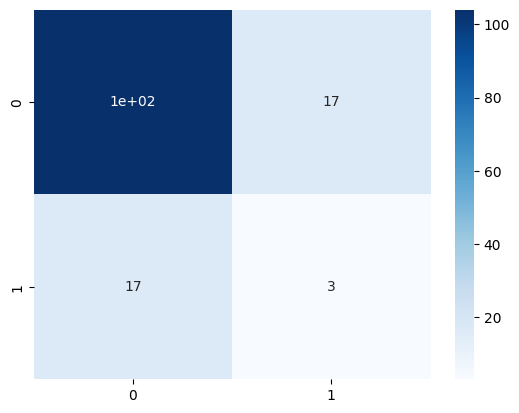

In [202]:
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

Random Forests

In [203]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8581560283687943


[[121   0]
 [ 20   0]]


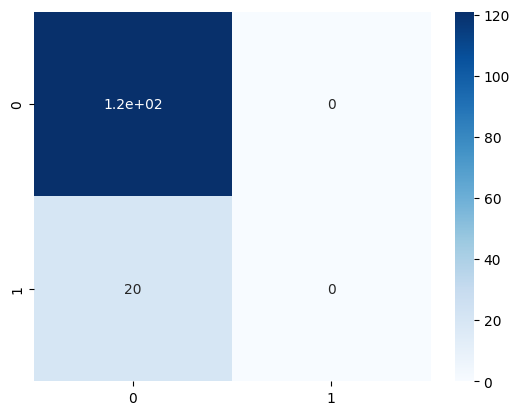

In [204]:
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

sns.heatmap(c_matrix, annot=True, cmap = 'Blues')
plt.show()

Feature Selection

In [205]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
rfe_selector = RFE(logReg, n_features_to_select=10)
rfe_selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [206]:
rfe_selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False, False,  True, False, False])

In [207]:
rfe_selector.ranking_

array([1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 3, 4, 1, 7, 6])

In [208]:
X_train.columns

Index(['Daignosis', 'Forced_Capacity', 'Forced_Expiration', 'Zubrod_scale',
       'Pain', ' Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',
       'Size_of_tumor', 'diabetes', 'MI_6months', 'PAD', 'Smoker', 'Asthmatic',
       'Age'],
      dtype='object')

In [209]:
top_features = ['Daignosis', 'Forced_Expiration', 'Zubrod_scale','Pain', 'Dyspnoea', 'Cough', 'Size_of_tumor',
                'diabetes', 'MI_6months', 'Smoker']
X_selected = X_train[top_features]
x_test_selected = x_test[top_features]

In [210]:
logreg3 = LogisticRegression()
logreg3.fit(X_selected,y_train)
print("score",logreg3.score(x_test_selected, y_test))

score 0.8581560283687943


Model Evaluation

In [211]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [212]:
def model_report(LogisticRegression, X, y, title = 'Model Report', weight=None):
    """Takes in classifier model with X data and class weight to display scores and confusion matrix."""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=3, stratify=y)

    clf = LogisticRegression(class_weight=weight, random_state=3)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    class_names = ['Live', 'Death']

    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
#     print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred, target_names=class_names))

    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    plt.show()

In [213]:
def class_weights_plot(model, title):
    """Plots accuracy, average precision, and correct death predictions of different class weights for X2 data."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    acc_scores = []
    prec_scores = []
    correct_deaths = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)

        acc_scores.append(accuracy_score(y, predicted))
        prec_scores.append(average_precision_score(y, predicted))
        correct_deaths.append(confusion_matrix(y, predicted)[1,1]/68)

    plt.figure(figsize=(8,6))
    plt.plot(class_weights, acc_scores, marker='.', label='Accuracy Score')
    plt.plot(class_weights, prec_scores, marker='.', label='Average Precision')
    plt.plot(class_weights, correct_deaths, marker='.', label='Correct Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

In [214]:
def class_weights_tf_plot(model, title):
    """Plots confusion matrix values of different class weights for X2 data."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    true_live = []
    false_live = []
    true_death = []
    false_death = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)

        true_live.append(confusion_matrix(y, predicted)[0,0]/385)
        false_live.append(confusion_matrix(y, predicted)[1,0]/68)
        true_death.append(confusion_matrix(y, predicted)[1,1]/68)
        false_death.append(confusion_matrix(y, predicted)[0,1]/385)

    plt.figure(figsize=(8,6))
    plt.plot(class_weights, true_live, marker='.', label='Correct Live Predictions')
    plt.plot(class_weights, false_live, marker='.', label='False Live Predictions')
    plt.plot(class_weights, true_death, marker='.', label='Correct Death Predictions')
    plt.plot(class_weights, false_death, marker='.', label='False Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()